# Project: TMDb movie data analysis
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> According to kaggle introduction page, the data contains information that are provided from The Movie Database (TMDb). It collects 5000+ movies and their rating and basic move information, including user ratings and revenue data. This dataset provides some metrics that measure how successful these movies are. These metrics include popularity, revenue and vote average.

> Questions To Explore

    >1. Which genres are most popular from year to year? 
    >2. Which genres are associated with movies that high revenue?
    >3. What kinds of properties are associated with movies that have high popularity?
    >4. What is the relationship between runtime and voteaverage?
    >5. Which months are considered best to release a movie?

<B>Import statements for all the packages</B>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")
import datetime as dt
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section we will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

### General Properties

Reading the CSV File into a DataFrame df_tmdb and viewing the basic information of the dataset.

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
df_tmdb = pd.read_csv('tmdb-movies.csv')
df_tmdb.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [4]:
# types and look for instances of missing or possibly errant data.
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Use describe to view the features of all the numerical coloums in the data

In [5]:
df_tmdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


From the results we observe that there are totally 10866 entries and total 21 columns. And there are some null value in the cast, director, overview and genres columns. Some columns have a lot of null values like homepage, tagline, keywords and production_companies. As the <B>homepage, overview and tagline</B> columns are not necessary for answering the questions above, so I decide to <B>drop the columns</B>.

We also notice that that 25% and 50% of revenue and budget values is equal to ZERO same applies to the columns budget_adj and revenue_adj

Let's see some descriptive statistics for the data set.

In [6]:
#Counting all the Null values
df_tmdb.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

We will count and dispaly all the null values for the respective columns

In [7]:
#Counting all the values with zeros in the respective columns 
df_tmdb.apply(lambda s : s.value_counts().get(0,0), axis=0)

id                         0
imdb_id                    2
popularity                 0
budget                  5696
revenue                 6016
original_title             4
cast                       6
homepage                   4
director                  45
tagline                    5
keywords                 134
overview                  13
runtime                   31
genres                   712
production_companies     156
release_date              28
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

<B>Here we will replcae all the 0 values in the columns to NAN as it is more easy to interpret/avoid in the mathematical calculations</B>

In [8]:
#Replace all Zeros with Nan

cols = df_tmdb.columns
df_tmdb[cols] = df_tmdb[cols].replace({'0':np.nan, 0:np.nan})
df_tmdb.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                   31
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

There are 5696 Nan values for budget column and 6016 for the revenue. 50% of the data have null valures. Hence, to keep the data integrity, I decide to retain these rows.

We can aslo <B>drop imdb_id</B>(Null values) and budget_adj,revenue_adj as we are not accounting for inflation over time. 

### Data Cleaning
   >1. Drop unnecessary columns.
   >2. Drop duplicates.
   >3. Drop null values columns with small quantity of nulls : cast, director,genres and runtime.
   >4. Convert to specifc datatypes

<B>We will drop all the columns that we will not use extensively in our analysis below</B>

In [9]:
# Drop unnecessary columns
col = ['imdb_id', 'homepage', 'tagline', 'overview', 'budget_adj', 'revenue_adj']
df_tmdb.drop(col, axis=1, inplace=True)

<B>Drop the duplicates.</B>


In [10]:
#Drop the duplicates
df_tmdb.drop_duplicates(inplace=True)

<B>Drop the null values in cast, director, genres and runtime columns.</B>

In [11]:
col2 = ['cast', 'director', 'genres','runtime']
df_tmdb.dropna(subset = col2, how='any', inplace=True)

In [12]:
# Check if nulls are dropped.
df_tmdb.isnull().sum()

id                         0
popularity                 0
budget                  5553
revenue                 5860
original_title             0
cast                       0
director                   0
keywords                1410
runtime                    0
genres                     0
production_companies     944
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [13]:
#check info on data set
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10703 entries, 0 to 10865
Data columns (total 15 columns):
id                      10703 non-null float64
popularity              10703 non-null float64
budget                  5150 non-null float64
revenue                 4843 non-null float64
original_title          10703 non-null object
cast                    10703 non-null object
director                10703 non-null object
keywords                9293 non-null object
runtime                 10703 non-null float64
genres                  10703 non-null object
production_companies    9759 non-null object
release_date            10703 non-null object
vote_count              10703 non-null float64
vote_average            10703 non-null float64
release_year            10703 non-null float64
dtypes: float64(8), object(7)
memory usage: 1.3+ MB


Change datatypes of columns to appropriate kinds. Ex. 'release_date' needs to be
datetime.

In [14]:
df_tmdb['release_date'] = pd.to_datetime(df_tmdb['release_date'])

<a id='eda'></a>
## Exploratory Data Analysis

We will draw histograms for all the numerical columns in the data frame to explore distribution and skeweness in the respeactive columns. 

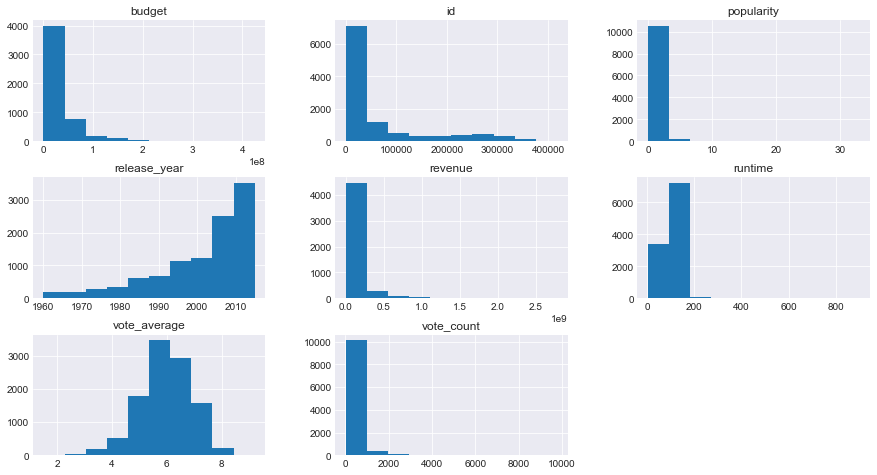

In [15]:
# Explore what the histogram of the data looks like
df_tmdb.hist(figsize=(15,8));

### Which genres are most popular from year to year? 

We will separate the genre details along with years to analyze the data. The DataFrame provides information about the number of movies in each genre for every year.

In [16]:
#Obtain the list of genres
genre_list = list(map(str,(df_tmdb['genres'])))
genre = []
for i in genre_list:
    split_genre = list(map(str, i.split('|')))
    for j in split_genre:
        if j not in genre:
            genre.append(j)

In [17]:
# prints the list of genres
print(genre)

['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy', 'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy', 'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror', 'Documentary', 'TV Movie', 'Foreign']


<B>We will obtain all the minimum and maximun values for year and convert them to integer </B>

In [18]:
# Obtain the years in dataset
# minimum range value
min_year = min(df_tmdb['release_year']).astype(int)
# maximum range value
max_year = max(df_tmdb['release_year']).astype(int)
# print the range
print(min_year, max_year)

1960 2015


We will create a dataFrame to depict each row by genre and each columns by year

In [19]:
# Creating a dataframe with genre as rows and years as columns
df_genre = pd.DataFrame(index = genre, columns = range(min_year, max_year + 1))
# replace un-assigned values to zero
df_genre= df_genre.fillna(value = 0)
print (df_genre.head())

                 1960  1961  1962  1963  1964  1965  1966  1967  1968  1969  \
Action              0     0     0     0     0     0     0     0     0     0   
Adventure           0     0     0     0     0     0     0     0     0     0   
Science Fiction     0     0     0     0     0     0     0     0     0     0   
Thriller            0     0     0     0     0     0     0     0     0     0   
Fantasy             0     0     0     0     0     0     0     0     0     0   

                 ...   2006  2007  2008  2009  2010  2011  2012  2013  2014  \
Action           ...      0     0     0     0     0     0     0     0     0   
Adventure        ...      0     0     0     0     0     0     0     0     0   
Science Fiction  ...      0     0     0     0     0     0     0     0     0   
Thriller         ...      0     0     0     0     0     0     0     0     0   
Fantasy          ...      0     0     0     0     0     0     0     0     0   

                 2015  
Action              0  
Ad

Here we will create an array of years to access the various movies in each year and split the genres and increment the value of genre in the correspoding position in the dataframe.

In [20]:
# list of years of each movie
year = np.array(df_tmdb['release_year'])
# index to access year value
z = 0
for i in genre_list:
    split_genre = list(map(str,i.split('|')))
    for j in split_genre:
        df_genre.loc[j, year[z]] = df_genre.loc[j, year[z]] + 1
    z+=1
df_genre

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Action,8,7,8,4,5,9,14,7,6,10,...,79,94,98,108,106,115,99,119,129,105
Adventure,5,6,7,7,5,6,11,7,5,5,...,55,60,63,71,58,61,50,65,67,68
Science Fiction,3,4,2,2,4,2,6,4,4,3,...,30,38,52,70,45,56,54,59,61,84
Thriller,6,0,7,10,9,11,8,5,5,3,...,114,123,127,157,133,146,160,174,177,171
Fantasy,2,2,1,2,4,0,2,3,5,2,...,34,47,43,48,42,45,33,38,36,32
Crime,2,2,3,4,10,2,5,7,5,3,...,53,65,62,52,49,48,54,70,65,51
Western,6,3,3,2,1,4,7,2,1,7,...,1,5,2,0,6,3,4,3,6,6
Drama,13,16,21,13,20,20,16,16,19,13,...,196,197,232,221,208,213,230,253,283,258
Family,3,5,2,3,4,3,7,3,5,4,...,63,45,54,58,54,70,41,47,43,44
Animation,0,1,0,1,2,1,3,1,3,2,...,35,31,32,47,47,42,35,42,35,37


Next we create a pie chart to depict the movie released in each genere over years. Which will give us a rough idea about the most common released genres in the entire dataset.

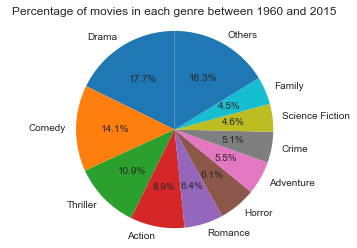

In [21]:
# number of movies in each genre so far.
genre_count = {}
genre = []
for i in genre_list:
    split_genre = list(map(str,i.split('|')))
    for j in split_genre:
        if j in genre:
            genre_count[j] = genre_count[j] + 1
        else:
            genre.append(j)
            genre_count[j] = 1
genre_series = pd.Series(genre_count)

# pi chart
genre_series = genre_series.sort_values(ascending = False)
label = list(map(str,genre_series[0:10].keys()))
label.append('Others')
gen = genre_series[0:10]
sum = 0
for i in genre_series[10:]:
    sum += i
gen['sum'] = sum
fig1, ax1 = plt.subplots()
ax1.pie(gen,labels = label, autopct = '%1.1f%%', startangle = 90)
ax1.axis('equal')
plt.title("Percentage of movies in each genre between 1960 and 2015")
plt.show()

The above chart depicts that most of the movies were relased in Drama genre followed by comedy and thrillers

Now we will create a dataframe in similar way to hold the popularity of the movies according to their genres every year.

<B>We will try to calculate the popularity over the year for each genre</B>

In [22]:
# Creating a dataframe with genre as index and years as columns to get a count of popularity
popularity_df = pd.DataFrame(index = genre, columns = range(min_year, max_year + 1))
# to fill not assigned values to zero
popularity_df = popularity_df.fillna(value = 0.0)

In [23]:
popularity_df.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Action,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adventure,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Science Fiction,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Thriller,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fantasy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# list of popularity levels of each movie
popularity = np.array(df_tmdb['popularity'])
# to check whether any popularity is zero.
print (len(popularity[popularity==0]))
# index to access year value
z = 0
for i in genre_list:
    split_genre = list(map(str,i.split('|')))
    for j in split_genre:
            popularity_df.loc[j, year[z]] = popularity_df.loc[j, year[z]] + popularity[z]
    z+=1
popularity_df

0


,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Action,4.725796,2.561389,5.671563,3.806916,4.065433,4.062358,3.686859,5.064989,2.193374,5.399760,...,60.183155,72.213809,88.448413,93.794086,99.913105,121.681073,111.986677,121.755363,216.979690,238.978128
Adventure,3.504904,4.603938,6.597594,5.099410,3.682157,3.490923,3.229519,7.178829,5.545733,3.744663,...,51.830019,51.230969,63.528230,81.909585,79.976961,69.960181,73.073879,84.141905,162.845275,224.705224
Science Fiction,0.983714,1.096410,0.358424,0.935671,0.906544,0.203911,1.906741,0.749862,5.374567,0.517620,...,23.845715,24.598403,40.234346,70.203464,37.223664,54.259455,50.663266,75.289444,142.102950,192.966558
Thriller,4.871460,0.000000,5.324075,7.199292,5.603219,3.773787,2.190952,3.509897,2.779596,2.613848,...,75.973838,91.636161,86.206629,102.665018,99.189172,116.041838,108.295298,128.132356,186.459378,239.720907
Fantasy,0.856495,0.308146,0.235542,0.428142,2.399162,0.000000,0.849542,0.561027,2.227921,0.408196,...,34.786562,44.995426,37.681697,50.581072,46.726062,45.870870,46.147053,39.531237,65.856645,55.551495
Crime,0.692959,1.613038,1.418448,2.209470,2.616900,0.774553,1.703508,3.768515,2.779596,2.844060,...,35.458092,44.358441,47.708682,28.100370,34.493390,42.801786,46.632713,64.920814,57.459754,87.823617
Western,3.406554,0.630062,1.242541,0.493914,0.127679,0.767331,1.712597,0.379480,0.621202,3.564572,...,0.463068,2.559719,0.731827,0.000000,4.347770,3.527401,6.931111,1.995766,4.043682,19.072777
Drama,7.361967,6.915731,8.232008,4.191829,7.296370,6.105756,5.436264,8.183477,7.500178,6.368528,...,109.077915,109.945124,123.706872,126.428760,122.743677,128.074568,140.217781,166.999176,246.325813,243.644550
Family,0.834191,3.778608,0.646926,2.557897,3.513194,1.988139,2.792269,2.886044,2.131317,1.609108,...,49.778057,39.023420,44.135879,49.201883,53.062884,54.976362,30.836140,39.314443,47.765725,60.237690
Animation,0.000000,2.631987,0.000000,2.180410,0.891493,0.600975,1.757152,2.550704,0.906404,0.874065,...,30.050629,22.443058,28.141789,39.727577,34.226116,43.387946,31.463643,36.320297,40.311176,44.235481


As we have noticed outliers in the popularity rating and also there are zero values. Hence, we can either fill the 0 values with median of the data then standarize the data or we can directly standardize the data where the negative values will depict low popularity and positive values will depict high popularity.

In [25]:
std_cov = lambda s:(s - s.mean()) / s.std(ddof = 0)
popularity_std = std_cov(popularity_df)
popularity_std.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Action,1.294596,0.302281,1.552327,0.713648,0.668671,1.422500,1.200709,0.966373,-0.128032,1.977653,...,0.831988,1.143396,1.433187,1.235214,1.516096,1.772865,1.629636,1.497001,1.841671,1.717120
Adventure,0.704728,1.288390,1.940326,1.353124,0.499612,1.075614,0.902690,1.769108,1.495220,1.049120,...,0.563551,0.473381,0.708819,0.929854,0.984723,0.538675,0.685783,0.705088,1.126551,1.553417
Science Fiction,-0.513374,-0.404987,-0.673835,-0.706935,-0.724680,-0.919747,0.040718,-0.672305,1.412339,-0.761299,...,-0.335754,-0.377037,0.031723,0.629077,-0.154813,0.164016,0.142200,0.518708,0.852543,1.189392
Thriller,1.364973,-0.934316,1.406732,2.392066,1.346972,1.247324,0.225921,0.375824,0.155823,0.414716,...,1.339438,1.763581,1.368024,1.463143,1.496800,1.638299,1.540099,1.631263,1.438495,1.725639
Fantasy,-0.574839,-0.785548,-0.725321,-0.958040,-0.066303,-1.043530,-0.648192,-0.744016,-0.111304,-0.822687,...,0.015842,0.274271,-0.042476,0.124900,0.098461,-0.036157,0.032656,-0.234145,-0.154678,-0.386683


We will create a series to hold most popular genre or every year.

In [26]:
pop_genre = pd.Series(index = range(min_year, max_year + 1))
pop_genre.head()

1960   NaN
1961   NaN
1962   NaN
1963   NaN
1964   NaN
dtype: float64

In [27]:
#identify the genre with maximum standardized popularity value
for i in range(min_year, max_year + 1):
    pop_genre[i] = popularity_std[i].argmax()
pop_genre

1960        Drama
1961        Drama
1962        Drama
1963     Thriller
1964       Comedy
1965        Drama
1966        Drama
1967        Drama
1968        Drama
1969        Drama
1970        Drama
1971        Drama
1972        Drama
1973        Drama
1974        Drama
1975        Drama
1976        Drama
1977    Adventure
1978        Drama
1979        Drama
1980       Action
1981    Adventure
1982        Drama
1983       Action
1984       Action
1985       Comedy
1986        Drama
1987       Comedy
1988       Comedy
1989       Comedy
1990        Drama
1991       Comedy
1992       Comedy
1993        Drama
1994        Drama
1995        Drama
1996        Drama
1997     Thriller
1998        Drama
1999        Drama
2000       Comedy
2001        Drama
2002        Drama
2003       Action
2004       Comedy
2005        Drama
2006        Drama
2007        Drama
2008        Drama
2009        Drama
2010        Drama
2011        Drama
2012        Drama
2013        Drama
2014        Drama
2015      

We can conclude that Drama is the the most popular genre over the years. we will plot the popularity levels for the Drama genre over the years.

As we see that Drama has been the most popular genre over the years. So we will try to visualize the popularity of genre "Drama" over the years.

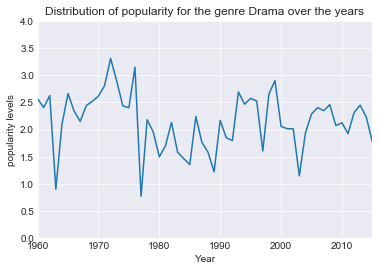

In [28]:
plt.plot(popularity_std.loc['Drama'])
plt.xlabel('Year')
plt.ylabel('popularity levels')
plt.title('Distribution of popularity for the genre Drama over the years')
plt.axis([1960, 2015, 0, 4])
plt.show()

From the above graph we can see the rise and fall of the genre Drama over the years. There are steep rises and falls in the popularity levels of the genre.

### Research Question 2:
Which genres are associated with movies that have high revenue?

<B>First we will create a copy of dataframe and drop all the NULL values from genre column </B>

In [29]:
#create a copy for df_tmdb dataframe 
df_tmdbcopy = df_tmdb.copy()

#remove Null values from genres column
df_tmdbcopy = df_tmdbcopy.dropna(subset=['genres'], axis=0)

<B>Then split the genres column by the "|" character and make each genre a new column</B>T

In [30]:
# Then split the genres column by the "|" character and make each genre a new column
genres = df_tmdbcopy['genres'].str.split('|', expand=True).rename(columns = lambda x: f"genre_{x+1}")

<B>Delete the original genre column</B>

In [31]:
# delete genres column
df_tmdbcopy.drop('genres', axis=1, inplace=True)

<B>Now we will merge the genre data frame and the tmdb copy dataframe </B>

In [32]:
# Now merge df_tmdbcopy and genres
df_tmdbcopy = pd.merge(df_tmdbcopy, genres, left_index=True, right_index=True, how='inner')

<B>We will extract the top 10 revenue generating movies</B>

In [33]:
# extract top 10 revenue generating movies 
top_rev = df_tmdbcopy.nlargest(10, 'revenue')
top_rev

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,production_companies,release_date,vote_count,vote_average,release_year,genre_1,genre_2,genre_3,genre_4,genre_5
1386,19995.0,9.432768,237000000.0,2.781506e+09,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,162.0,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458.0,7.1,2009.0,Action,Adventure,Fantasy,Science Fiction,None
3,140607.0,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136.0,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292.0,7.5,2015.0,Action,Adventure,Science Fiction,Fantasy,None
5231,597.0,4.355219,200000000.0,1.845034e+09,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,shipwreck|iceberg|ship|panic|titanic,194.0,Paramount Pictures|Twentieth Century Fox Film ...,1997-11-18,4654.0,7.3,1997.0,Drama,Romance,Thriller,None,None
4361,24428.0,7.637767,220000000.0,1.519558e+09,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,new york|shield|marvel comic|comic|superhero,143.0,Marvel Studios,2012-04-25,8903.0,7.3,2012.0,Science Fiction,Action,Adventure,None,None
0,135397.0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562.0,6.5,2015.0,Action,Adventure,Science Fiction,Thriller,None
4,168259.0,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137.0,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947.0,7.3,2015.0,Action,Crime,Thriller,None,None
14,99861.0,5.944927,280000000.0,1.405036e+09,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,marvel comic|comic|sequel|superhero|vision,141.0,Marvel Studios|Prime Focus|Revolution Sun Studios,2015-04-22,4304.0,7.4,2015.0,Action,Adventure,Science Fiction,None,None
3374,12445.0,5.711315,125000000.0,1.327818e+09,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,David Yates,self sacrifice|magic|frog|sorcerer|school,130.0,Warner Bros.|Heyday Films|Moving Picture Compa...,2011-07-07,3750.0,7.7,2011.0,Adventure,Family,Fantasy,None,None
5422,109445.0,6.112766,150000000.0,1.274219e+09,Frozen,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,queen|musical|princess|betrayal|snowman,102.0,Walt Disney Pictures|Walt Disney Animation Stu...,2013-11-27,3369.0,7.5,2013.0,Animation,Adventure,Family,None,None
5425,68721.0,4.946136,200000000.0,1.215440e+09,Iron Man 3,Robert Downey Jr.|Gwyneth Paltrow|Guy Pearce|D...,Shane Black,terrorist|war on terror|tennessee|malibu|marve...,130.0,Marvel Studios,2013-04-18,6882.0,6.9,2013.0,Action,Adventure,Science Fiction,None,None


<B>First, we'll create a copy of the df and delete all unrelated columns and Group the genres by type and count the number of times they occur</B>

In [34]:
# Group the genres by type and count the number of times they occur
# First, we'll create a copy of the df and delete all unrelated columns
top_revcopy = top_rev.copy()
top_revcopy.drop(['id' ,'popularity','original_title','runtime','release_date','budget','revenue','cast','director','keywords','production_companies','vote_count','vote_average','release_year'],axis=1, inplace=True)
df1 = top_revcopy.melt()

In [35]:
# use crosstab to group the genres, and assign it to a new df.
df2 = pd.crosstab(index=df1['value'], columns=df1['variable'])
df2

variable,genre_1,genre_2,genre_3,genre_4
value,,,,
Action,6,1,0,0
Adventure,1,6,1,0
Animation,1,0,0,0
Crime,0,1,0,0
Drama,1,0,0,0
Family,0,1,1,0
Fantasy,0,0,2,1
Romance,0,1,0,0
Science Fiction,1,0,4,1


In [36]:
# Create a new column with the totals for each genre title
df2['totals'] = df2['genre_1'] + df2['genre_2'] + df2['genre_3'] + df2['genre_4']
df2

variable,genre_1,genre_2,genre_3,genre_4,totals
value,,,,,
Action,6,1,0,0,7
Adventure,1,6,1,0,8
Animation,1,0,0,0,1
Crime,0,1,0,0,1
Drama,1,0,0,0,1
Family,0,1,1,0,2
Fantasy,0,0,2,1,3
Romance,0,1,0,0,1
Science Fiction,1,0,4,1,6


Using the above data we will create a bar plot to visualize the genres which generates the most revenue. 

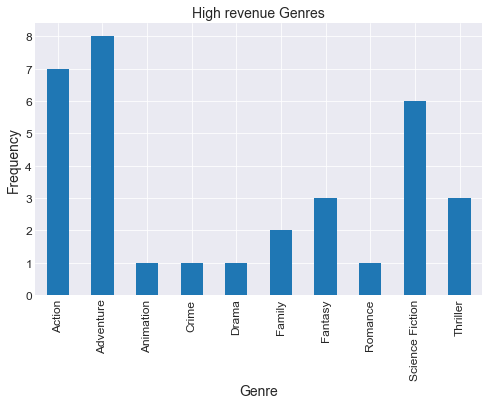

In [37]:
# Plot in a bar chart
df2['totals'].plot(kind="bar", figsize=(8,5), fontsize=12)
plt.xlabel('Genre', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.title('High revenue Genres', fontsize = 14);

Conclusion: From the charts above we can clearly conclude that action, adventure and scinece fiction movies are high revenue generators.

### Research Question 3:
What kinds of properties are associated with movies that have high popularity?

> 1. What's the budget level associated with movies that have high popularity?
> 2. What's the revevue level associated with movies that have high popularity?
> 3. What's the runtime level associated with movies that have high popularity?

We will divide the Budget and reveue into buckets to divided data into four levels according to their quartile(min, 25%, 50%, 75%, max): 'Low', 'Medium', 'Moderately High', 'High'.

In [38]:
#quantile_buckets function
def quantile_buckets(dfname ,column_name):
    #Get the values for the quantile
    min_value = dfname[column_name].min()
    first_quantile = dfname[column_name].describe()[4]
    second_quantile = dfname[column_name].describe()[5]
    third_quantile = dfname[column_name].describe()[6]
    max_value = dfname[column_name].max()
    #define boundries 
    bin_edges = [ min_value, first_quantile, second_quantile, third_quantile, max_value]
    #name the columns 
    bin_names = [ 'Low', 'Medium', 'Moderately High', 'High']
    # Creates budget_levels column
    name = '{}_levels'.format(column_name)
    dfname[name] = pd.cut(dfname[column_name], bin_edges, labels=bin_names, include_lowest = True)
    return dfname    

> <B>1. What's the budget level associated with movies that have high popularity?</B>

First, divided budget data into four levels with it's quartile: 'Low', 'Medium', 'Moderately High', 'High' and create a level column.

In [39]:
df_tmdb = quantile_buckets(df_tmdb,'budget')
df_tmdb.head(1)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_levels
0,135397.0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562.0,6.5,2015.0,High


In [40]:
#Find the median popularity of each level with groupby. 
budget_median = df_tmdb.groupby('budget_levels')['popularity'].median()
budget_median    

budget_levels
Low                0.367621
Medium             0.507987
Moderately High    0.733975
High               1.232098
Name: popularity, dtype: float64

In [41]:
# the x locations for the groups
index_budget = np.arange(len(budget_median))  
# the width of the bars
width = 0.5       
index_budget

array([0, 1, 2, 3])

<B>Now, that we have the required data, we will plot a bar chart to visualize the budget levels for movies that have high popularity.</B> 

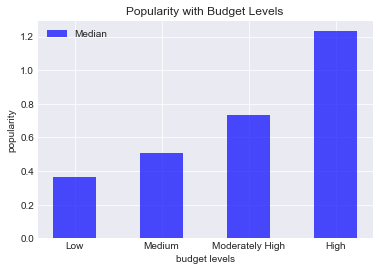

In [42]:
# plot bars
bars = plt.bar(index_budget, budget_median, width, color='b', alpha=.7, label='Median')

# title and labels
plt.ylabel('popularity')
plt.xlabel('budget levels')
plt.title('Popularity with Budget Levels')
locations = index_budget
labels = budget_median.index  
plt.xticks(locations, labels)
# legend
plt.legend()

<B>From the figure above, we can see that movies with higher popularity have higher budget level. </B>

> <B>2. What's the revenue level associated with movies that have high popularity?</B>

In [43]:
df_tmdb = quantile_buckets(df_tmdb,'revenue')
df_tmdb.head(1)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_levels,revenue_levels
0,135397.0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562.0,6.5,2015.0,High,High


In [44]:
#Find the median popularity of each level with groupby. 
revenue_median = df_tmdb.groupby('revenue_levels')['popularity'].median()
revenue_median

revenue_levels
Low                0.392776
Medium             0.499890
Moderately High    0.787639
High               1.554808
Name: popularity, dtype: float64

In [45]:
# the x locations for the groups
index_revenue = np.arange(len(revenue_median))  
# the width of the bars
width = 0.5       
index_revenue

array([0, 1, 2, 3])

<B>Now, that we have the required data, we will plot a bar chart to visualize the revenue levels for movies that have high popularity.</B> 

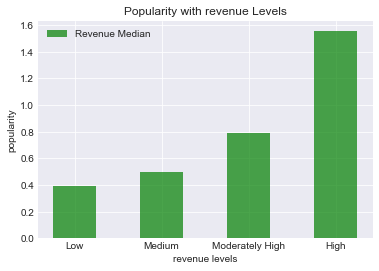

In [46]:
# plot bars
bars = plt.bar(index_revenue, revenue_median, width, color='g', alpha=.7, label='Revenue Median')

# title and labels
plt.ylabel('popularity')
plt.xlabel('revenue levels')
plt.title('Popularity with revenue Levels')
locations = index_revenue 
labels = revenue_median.index  
plt.xticks(locations, labels)
# legend
plt.legend()

From the above grapgh we conclude that movies that have high popularity will definitely generate more revenue.

> <B>3. What's the runtime level associated with movies that have high popularity?</B>

Divide runtime data into four levels with it's quartile: 'Short', 'Medium', 'Moderately Long', 'Long'.

In [47]:
df_tmdb = quantile_buckets(df_tmdb,'runtime')
df_tmdb.head(1)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_levels,revenue_levels,runtime_levels
0,135397.0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562.0,6.5,2015.0,High,High,High


<B> We will calculate the median for each quantile</B>

In [48]:
# Find the median popularity of each level with groupby
runtime_median = df_tmdb.groupby('runtime_levels')['popularity'].median()
runtime_median

runtime_levels
Low                0.290399
Medium             0.366125
Moderately High    0.420568
High               0.529933
Name: popularity, dtype: float64

In [49]:
# the x locations for the groups
runtime_index = np.arange(len(runtime_median)) 
# the width of the bars
width = 0.5     

<B>We will plot a bar chart for the popularity associated with different runtime levels </B>

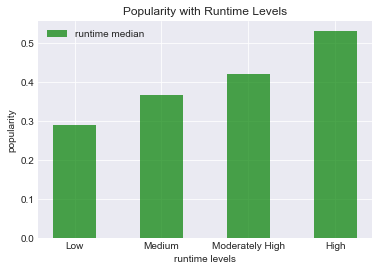

In [50]:
# plot bars
bars = plt.bar(runtime_index, runtime_median, width, color='g', alpha=.7, label='runtime median')

# title and labels
plt.ylabel('popularity')
plt.xlabel('runtime levels')
plt.title('Popularity with Runtime Levels')
locations = runtime_index
labels = runtime_median.index  
plt.xticks(locations, labels)
# legend
plt.legend()

From the above grapgh we conclude that movies that have high runtime have high popularity.

### Research Question 3:

> 
<B>What is the relationship between runtime and vote
average?</B>

<B>We will plot a scatter plot for the vote_average and runtime to find the relation between the both the columns</B>

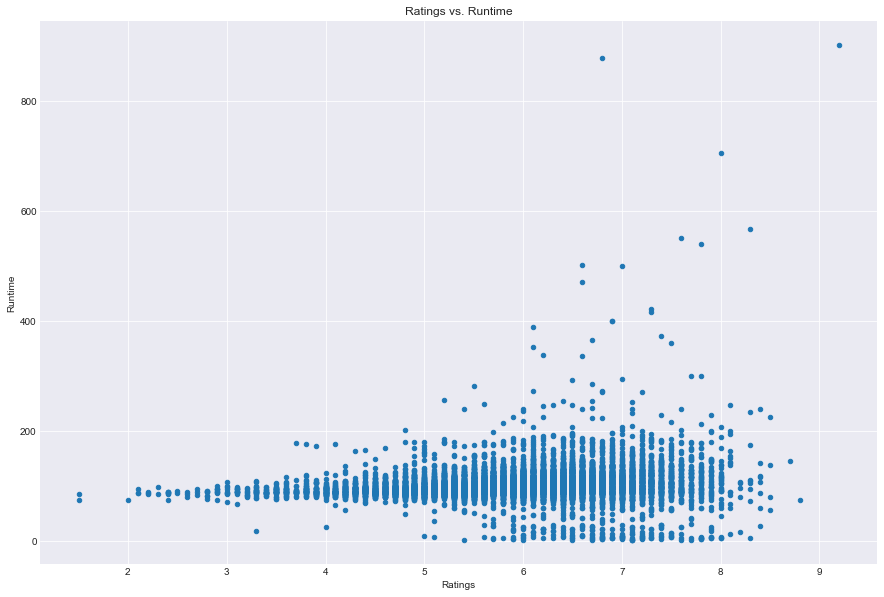

In [51]:
# Plot scatter plot of these two columns
df_tmdb.plot(x='vote_average', y='runtime', kind='scatter', figsize=(15,10))
plt.title('Ratings vs. Runtime')
plt.xlabel('Ratings')
plt.ylabel('Runtime');

The films with shorter duration can have medium to high rating. We cannot predict anything for the with duration of around 100 minutes. Movies and series(as we have runtime of 400 and 600 minutes) have higher rating.

<B>What is the relationship between popularity and vote
average?</B>

<B>We will plot a scatter plot for the vote_average and popularity to find the relation between the both the columns</B>

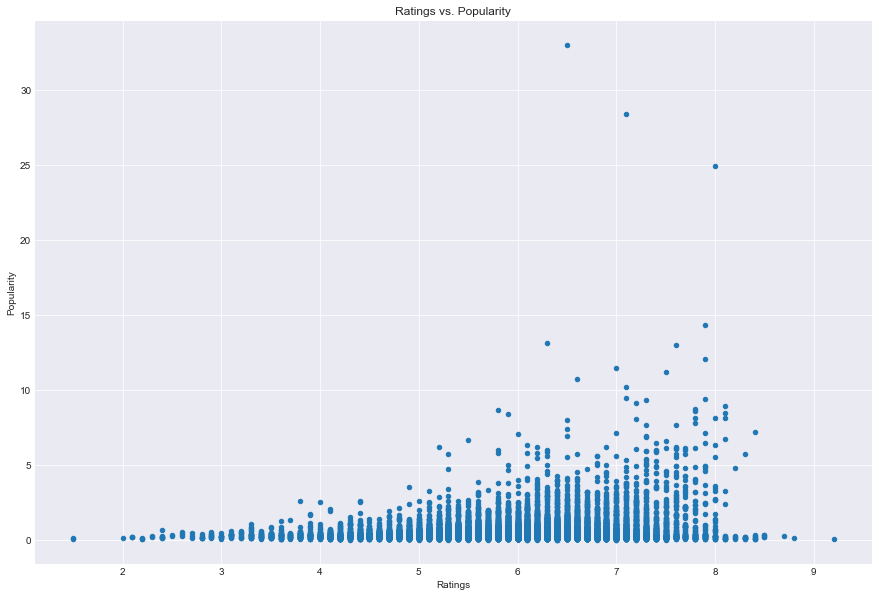

In [52]:
# Plot scatter plot of these two columns
df_tmdb.plot(x='vote_average', y='popularity', kind='scatter', figsize=(15,10))
plt.title('Ratings vs. Popularity')
plt.xlabel('Ratings')
plt.ylabel('Popularity');

Conclusion: We can clearly conclude that movies with higher vote average are popular.

### Research Question 4:

> <B>What month is considered "best" for releasing a Movie?</B>

<B>We will create a new column called month extracting the month from 'release_date</B>

In [53]:
#create a new column called "month".
#extract the month from release_date.
df_tmdb['month'] = df_tmdb['release_date'].apply(lambda x: x.month)

<B>We will group the data by month and sum all the revenues</B>

In [54]:
# Group by month and sum the revenues.
revenue_bymonth = df_tmdb.groupby('month')['revenue'].sum()
revenue_bymonth

month
1     1.296848e+10
2     1.979379e+10
3     3.139344e+10
4     2.639267e+10
5     5.045487e+10
6     6.166059e+10
7     4.533783e+10
8     2.547777e+10
9     2.573147e+10
10    2.935371e+10
11    4.589625e+10
12    5.821186e+10
Name: revenue, dtype: float64

<B>Now using bar charts we will visualize the revenue levels as per month on which the movies were released </B>

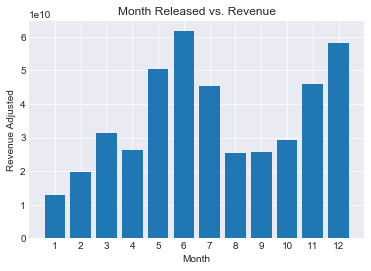

In [55]:
# Now plot these in a bar chart.
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12], revenue_bymonth, tick_label = [1,2,3,4,5,6,7,8,9,10,11,12])
plt.title('Month Released vs. Revenue')
plt.ylabel('Revenue Adjusted')
plt.xlabel('Month');

From the chart above we can conclude that the June and December month's releases collect high revenue. However, we need to ensure that it not because of just more movies released during these months. 

<B>Hence, we count the unique values form the month columns</B>

In [56]:
df_tmdb['month'].value_counts()

9     1318
10    1133
12     972
8      906
1      888
6      819
3      811
5      804
11     795
7      789
4      789
2      679
Name: month, dtype: int64

Then we find the mean and median for the values to determine how far the data deviates. 

In [57]:
df_tmdb['month'].value_counts().mean()

891.9166666666666

In [58]:
df_tmdb['month'].value_counts().median()

815.0

We can observe that the movie releases range from 679 to 1318. The mean and median are 891 and 815 respectively. This means there's no significant data to conclude there were a few high-earning movies that skewed the data, or that there were more movie releases during those months.

Therefore, we can still conclude June and December are "better" months to release
movies in, as they'll most likely produce the highest revenue.

<a id='Limitations'></a>
## Limitations


We have almost 50% of the revenue and budget columns as null or zero values which will impact the results. We have very less data(less than 50%) left after removing those columns due to which we have to keep the 0 values. We have tried to minimize that by replacing them with null. However, we still won't get the most accurate predictions.

<a id='conclusions'></a>
## Conclusions

We can observe that he most popular genre in most of the years is Drama. The table gives a list of the most popular genres from 1960 to 2015. The graphs shows the popularity distribution of the genre drama over the years in the given data-set and the distribution of genres in the movie set. Hence, drama is the most popular over the years although it could so because it was mostly made.

We observed that Action, adventure and science fiction genres are the high revenue generator. As they were not the most made genres we can conclude that they are revenue generators.

From further investigation we can see that movies with high budget levels are highly popular and generates high revenue. However, there is a limitation if the production cost includes the marketing campaigns and premiere events, which eventually increases the popularity and revenue.

We also observed that movies with higher run-time are highly popular. However, it could be the series(as we have run-time of 400 and 600 minutes) which are released in episodes over a certain period of times which increases the popularity over time.  Although we did not need any confirmation but just to put it in papers and prove it we see that that the movies with higher ratings are highly popular.

We also observed that the movies released in the month of June and December months collect most revenue. 

Hence, we can conclude from the above observation that Drama is the most popular and most commonly made genre.However, action, adventure and science fiction are high revenue generators. Movies with high budget levels, longer run-time and if released in June and December are highly popular and generate high revenues. 